## 1 - SetUp Environment

In [1]:
import numpy as np
import pandas as pd
import pickle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 - Load Dataframe

now we should load the dataframe that we saved in the previous section.

In [2]:
with open('/content/drive/MyDrive/Python/Regression/Assets/df(1.Final).pickle', 'rb') as file:
    df = pickle.load(file)

df.head(3)

,Year,Month,Week Day,Duration,Cost,Team Member,Height,Frequency,Signal Strength,Antenna Type,Orientation,Power Supply,Zone
0,2019,3,0,241.0,516773.0,12.0,24.0,Very Low Frequencies (VLF),3,Dielectric,Omni-directional,Solar-powered,North
1,2019,10,2,608.0,954888.0,22.0,42.0,Very Low Frequencies (VLF),3,Dielectric,Circular,Active,Center
2,2019,6,5,772.0,932640.0,14.0,43.0,Very High Frequencies (VHF),3,Printed Circuit Board (PCB),Horizontal,Active,Center


## 3 - Descriptive Analysis Function

in this section, we make a function in which all descriptive analysis measurments are calculated.

the quantitative variables of this dataset are:</br>
<li> Duration
<li> Cost
<li> Team Member
<li> Height

In [3]:
quantitative_list = ['Duration' , 'Cost' , 'Team Member' , 'Height']

the qualitative variables of this dataset are:</br>
<li> Year
<li> Month
<li> Week Day
<li> Frequency
<li> Signal Strength
<li> Antenna Type
<li> Orientation
<li> Power Supply
<li> Zone

In [4]:
qualitative_list = ['Year' , 'Month' , 'Week Day' , 'Frequency' , 
                    'Signal Strength' , 'Antenna Type' , 'Orientation',
                   'Power Supply' , 'Zone']

### 3.1 - Quantitative

In [5]:
def quantitative_analysis(qn):
    #central measures
    Mean = df[qn].mean()
    Median = df[qn].median()
    
    #dispersion measures - part 1
    Range = max(df[qn]) - min(df[qn])
    Min = df[qn].quantile(0)
    Q1 = df[qn].quantile(0.25)
    Q3 = df[qn].quantile(0.75)
    IQR = Q3 - Q1
    Max = df[qn].quantile(1)
    
    #dispersion measures - part 2
    Var = df[qn].var()
    Std = df[qn].std()
    
    #shape measures
    Skewness = df[qn].skew()
    Kurtosis = df[qn].kurt()
    
    qn_dict = {'Variable': [qn], 
    'Mean': [round(Mean,0)], 'Median': [round(Median,0)], 
    'Range': [round(Range,1)], 'Min': [round(Min,1)] , 'Q1': [round(Q1,1)], 'IQR': [round(IQR,1)], 'Q3': [round(Q3,1)], 'Max': [round(Max,1)],
    'Variance': [round(Var,1)], 'St.d': [round(Std,1)],
    'Skewness': [round(Skewness,3)] , 'Kurtosis': [round(Kurtosis,3)] }
    
    qn_df = pd.DataFrame(qn_dict)
    
    return qn_df

### 3.2 - Qualitative

In [6]:
def qualitative_analysis(ql):
    fTable = df[ql].value_counts()
    return fTable

## 4 - Statistical Analysis of Variables

Now, we run the funcion and find the measurements.

### 4.1 - Quantitative

In [7]:
print(len(quantitative_list) - 1)

3


#### 4.1.1 - Duration

In [8]:
quantitative_analysis(quantitative_list[0])

,Variable,Mean,Median,Range,Min,Q1,IQR,Q3,Max,Variance,St.d,Skewness,Kurtosis
0,Duration,764.0,680.0,1996.0,102.0,310.0,823.5,1133.5,2098.0,259905.3,509.8,0.565,-0.663


<li><b>Mean</b>: <i>it means that the average duration of the events in the dataset is 764 days.</i>
<li><b>Median</b>: <i>it means that half of the durations in the dataset are shorter than 680 and the other half are longer than 680</i>
<li><b>Range</b>: <i>it means that the difference between the maximum and minimum duration in the dataset is 1990 days</i>
<li><b>Min</b>: <i>it means that the shortest duration of all the projects in the dataset is 102 days</i>
<li><b>Q1</b>: <i>it means that 25% of the durations in the dataset are less than or equal to 310, and 75% are greater than 310.</i>
<li><b>IQR</b>: <i>it mean 50% of duration are between 310 and 1133 days</i>
<li><b>Q3</b>: <i>it means that 75% of the durations in the dataset are less than or equal to 1133, and 25% are greater than 1133.</i>
<li><b>Max</b>: <i>it means that the longest duration of all the projects in the dataset is 2098 days</i>
<li><b>St.d</b>: <i>it means that the durations of the projects vary from the mean duration of the dataset by an average of 509 days</i>
<li><b>Skewness</b>: <i>it means that the distribution of the durations is skewed to the right of distribution.</i>
<li><b>Kurtosis</b>: <i>it indicates that the distribution of the durations is flat compared to a normal distribution</i>
</br></br>
Result: It would be better if we decrease the St.d to have higher kurtosis & we decrease mean to have symmetric skewness.

#### 4.1.2 - Cost

In [9]:
quantitative_analysis(quantitative_list[1])

,Variable,Mean,Median,Range,Min,Q1,IQR,Q3,Max,Variance,St.d,Skewness,Kurtosis
0,Cost,1088845.0,1100133.0,1953307.0,104403.0,644073.5,959828.5,1603902.0,2057710.0,3.188424e+11,564661.3,-0.109,-1.172


<li><b>Mean</b>: <i>it means that the average cost of the projects in the dataset is 1088845 dollars.</i>
<li><b>Median</b>: <i>it means that half of the costs in the dataset are shorter than 110013 and the other half are longer than 110013</i>
<li><b>Range</b>: <i>it means that the difference between the maximum and minimum cost in the dataset is 1953307 dollars</i>
<li><b>Min</b>: <i>it means that the lowest cost of all the projects in the dataset is 104403 dollars</i>
<li><b>Q1</b>: <i>it means that 25% of the costs in the dataset are less than or equal to 644073 dollars, and 75% are greater than 644073 dollars.</i>
<li><b>IQR</b>: <i>it mean 50% of costs are between 644073 and 1603902 dollars</i>
<li><b>Q3</b>: <i>it means that 75% of the costs in the dataset are less than or equal to 1603902, and 25% are greater than 1603902 dollars.</i>
<li><b>Max</b>: <i>it means that the highest cost of all the projects in the dataset is 2057710 dollars</i>
<li><b>St.d</b>: <i>it means that the cost of the projects vary from the mean cost of the dataset by an average of 564661 dollars</i>
<li><b>Skewness</b>: <i>it means that the distribution of the cost is skewed to the left of distribution.</i>
<li><b>Kurtosis</b>: <i>it indicates that the distribution of the cost is flat compared to a normal distribution</i>
</br></br>
Result: It would be better if we decrease the St.d to have higher kurtosis & we increase mean to have symmetric skewness.

#### 4.1.1 - Team Member

In [10]:
quantitative_analysis(quantitative_list[2])

,Variable,Mean,Median,Range,Min,Q1,IQR,Q3,Max,Variance,St.d,Skewness,Kurtosis
0,Team Member,21.0,21.0,20.0,10.0,15.0,11.0,26.0,30.0,39.3,6.3,-0.203,-1.269


<li><b>Mean</b>: <i>it means that the average members of the projects in the dataset is 21 people.</i>
<li><b>Median</b>: <i>it means that half of the number of project's members in the dataset are shorter than 21 and the other half are longer than 21</i>
<li><b>Range</b>: <i>it means that the difference between the maximum and minimum team member in the dataset is 20 people</i>
<li><b>Min</b>: <i>it means that the lowest team member of all the projects in the dataset is 10 people</i>
<li><b>Q1</b>: <i>it means that 25% of the number of team member in the dataset are less than or equal to 15 people, and 75% are greater than 15 people.</i>
<li><b>IQR</b>: <i>it mean 50% of team member are between 15 and 26 people</i>
<li><b>Q3</b>: <i>it means that 75% of the team member in the dataset are less than or equal to 26, and 25% are greater than 26 people.</i>
<li><b>Max</b>: <i>it means that the highest team member of all the projects in the dataset is 30 people</i>
<li><b>St.d</b>: <i>it means that the number of team member of the projects vary from the mean project's team member of the dataset by an average of 6.3 people</i>
<li><b>Skewness</b>: <i>it means that the distribution of the team member is skewed to the left of distribution.</i>
<li><b>Kurtosis</b>: <i>it indicates that the distribution of the team member is flat compared to a normal distribution</i>
</br></br>
Result: It would be better if we decrease the St.d to have higher kurtosis & we increase mean to have symmetric skewness.

#### 4.1.1 - Height

In [11]:
quantitative_analysis(quantitative_list[3])

,Variable,Mean,Median,Range,Min,Q1,IQR,Q3,Max,Variance,St.d,Skewness,Kurtosis
0,Height,35.0,35.0,30.0,20.0,27.0,16.0,43.0,50.0,85.2,9.2,0.027,-1.222


<li><b>Mean</b>: <i>it means that the average height of antenna in the dataset is 35 meters.</i>
<li><b>Median</b>: <i>it means that half of the height of antenna in the dataset are shorter than 35 meters and the other half are longer than 35</i>
<li><b>Range</b>: <i>it means that the difference between the maximum and minimum heights in the dataset is 30 meters</i>
<li><b>Min</b>: <i>it means that the shortest antenna of all the projects in the dataset is 20 meters</i>   
<li><b>Q1</b>: <i>it means that 25% of the heights in the dataset are less than or equal to 27 meters, and 75% are greater than 27 meters.</i>
<li><b>IQR</b>: <i>it mean 50% of heights are between 27 and 43 meters</i>
<li><b>Q3</b>: <i>it means that 75% of the heights in the dataset are less than or equal to 43, and 25% are greater than 43 meters.</i>
<li><b>Max</b>: <i>it means that the highest antenna of all the projects in the dataset is 43 meters</i>
<li><b>St.d</b>: <i>it means that the height antenna of the projects vary from the mean heights of the dataset by an average of 9.2 meters</i>   
<li><b>Skewness</b>: <i>it means that the distribution of the heights is skewed to the right of distribution.</i>
<li><b>Kurtosis</b>: <i>it indicates that the distribution of the heights is flat compared to a normal distribution</i>
</br></br>
Result: It would be better if we decrease the St.d to have higher kurtosis & we decrease mean to have symmetric skewness.

### 4.2 - Qualitative

In [12]:
print(len(qualitative_list) - 1)

8


In [13]:
def frequency_table(a):
    fTable = qualitative_analysis(a)
    fdf = pd.DataFrame(fTable)
    
    return fdf

#### 4.2.1 - Year

In [14]:
a = qualitative_list[0]

frequency_table(a)

,Year
2017,88
2018,80
2019,65
2020,40
2021,26


<i>the table shows the most frequent year in all dataset is 2017</i>

#### 4.2.2 - Month

In [15]:
a = qualitative_list[1]

frequency_table(a)

,Month
3,37
5,33
11,30
10,28
8,27
12,23
2,23
1,22
7,21
9,21


<i>the table shows the most projects begin in March. Wherease April acounts for the minimum data</i>

#### 4.2.3 - Week Day

In [16]:
a = qualitative_list[2]

frequency_table(a)

,Week Day
4,49
2,48
0,47
5,41
3,39
6,38
1,37


<i>the table shows the most project begin in Friday. Whereas Tuesday acounts for the minimum data</i>

#### 4.2.4 - Antenna Frequency

In [17]:
a = qualitative_list[3]

frequency_table(a)

,Frequency
High Frequencies (HF),56
Super-High Frequencies (SHF),44
Very Low Frequencies (VLF),39
Low Frequencies (LF),36
Ultra-High Frequencies (UHF),34
Medium Frequencies (MF),33
Very High Frequencies (VHF),31
Extremely High Frequencies (EHF),26


<i>the table shows the HF is the most frequent frequency, whereas EHF is not very popular.</i>

#### 4.2.5 - Signal Strength

In [18]:
a = qualitative_list[4]

frequency_table(a)

,Signal Strength
4,69
3,55
5,53
0,47
1,40
2,35


<i>the table shows the signal strength 4 is the most applicable, whereas 2 is least signal strength.</i>

#### 4.2.6 - Antenna Type

In [19]:
a = qualitative_list[5]

frequency_table(a)

,Antenna Type
Printed Circuit Board (PCB),83
Aperture,57
Reflector,44
Array,41
Dielectric,40
Wire,34


<i>the table shows the Printed Circuit Board (PCB) accounts for the highest number of data with 83 values, whereas Wire has the least useage.</i>

#### 4.2.7 - Orientation

In [20]:
a = qualitative_list[6]

frequency_table(a)

,Orientation
Horizontal,83
Omni-directional,75
Circular,71
Vertical,70


<i>the table shows the Horizontal Orientation is most frequent, but Vertical mode has the minimum number of usage.</i>

#### 4.2.8 - Power Supply

In [21]:
a = qualitative_list[7]

frequency_table(a)

,Power Supply
Battery-powered,85
Active,56
PoE,55
Passive,54
Solar-powered,49


<i>the table shows the Battery-powered is most frequent, but Solar-powered has the minimum number of usage.</i>

#### 4.2.9 - Zone

In [22]:
a = qualitative_list[8]

frequency_table(a)

,Zone
North,68
West,61
East,61
Center,56
South,53


<i>the table shows the most projects have been done in north, but in south we see the lowest number of projects.</i>

## 5 - Ditribution Graph for Quantitative

first we create a funcion to draw density plot

In [23]:
def kde_plot(x):
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    plt.figure(figsize = (8,3))
    sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})
    sns.despine(left = True)
    
    mean_age = df[x].mean()
    median_age = df[x].median()
    
    plt.axvline(mean_age, color ='black', linestyle ='dashed')
    plt.axvline(median_age, color ='green', linestyle ='solid')
    plt.xlabel('')
    plt.ylabel('')
    
    return plt.show()

#### 5.1 - Duration

<ipython-input-23-9a6239e94a5c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})


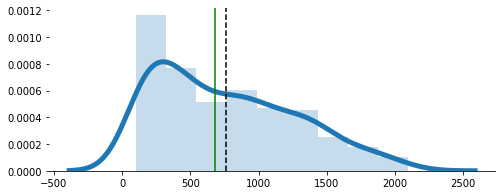

In [24]:
kde_plot(quantitative_list[0])

<li> The duration is in ranging from 102 (min) to 2098 (max) and mean is 764 (dahsed line) and median is 680 (red line).
<li> since median is lower than mean, we have right skewed distribution (skewness is 0.565), and it means we may have big value outliers.
<li>The y-axis in this plot would represent the probability density of the scores at each point along the x-axis. It means the total probability of observing a score within the range of 102 to 2098 is 1.
<li>The peak of the KDE plot is near 0.0008 on the y-axis, it means that the estimated probability density is highest at that point. 

#### 5.2 - Cost

<ipython-input-23-9a6239e94a5c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})


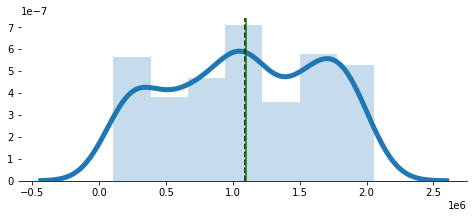

In [25]:
kde_plot(quantitative_list[1])

<li> The cost is in ranging from 104403 (min) to 2057710 (max) and mean is 1088845 (dahsed line) and median is 1100133 (red line).
<li> since median and mode are close together, we have roughly symmetric distribution (skewness is -0.109), but it is not normal and instead it is biomodal.
<li>The y-axis in this plot would represent the probability density of the scores at each point along the x-axis. It means the total probability of observing a score within the range of 104403 to 2057710 is 1.
<li>The peak of the KDE plot is near 0.0000006 on the y-axis, it means that the estimated probability density is highest at that point. 

#### 5.3 - Team Member

<ipython-input-23-9a6239e94a5c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})


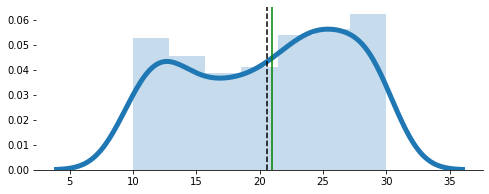

In [26]:
kde_plot(quantitative_list[2])

<li> The team member is in ranging from 10 (min) to 30 (max) and mean is 21 (dahsed line) and median is 21 (red line).
<li> since median and mode are close together, we have roughly symmetric distribution (skewness is -0.203), but it is not normal and instead it is biomodal.
<li>The y-axis in this plot would represent the probability density of the scores at each point along the x-axis. It means the total probability of observing a score within the range of 10 to 30 is 1.
<li>The peak of the KDE plot is near 0.0055 on the y-axis, it means that the estimated probability density is highest at that point. 

#### 5.4 - Height

<ipython-input-23-9a6239e94a5c>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], kde_kws={"lw": 5}, hist_kws = {'alpha': 0.25})


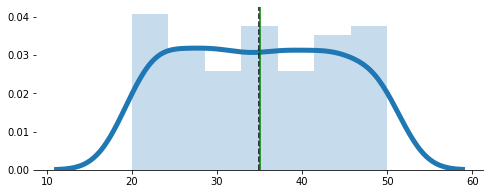

In [27]:
kde_plot(quantitative_list[3])

<li> The height is in ranging from 20 (min) to 50 (max) and mean is 35 (dahsed line) and median is 35 (red line).
<li> since median and mode are close together, we have roughly symmetric distribution (skewness is 0.027), but it is not normal and instead it is unimodal.
<li>The y-axis in this plot would represent the probability density of the scores at each point along the x-axis. It means the total probability of observing a score within the range of 20 to 50 is 1.
<li>The peak of the KDE plot is near 0.032 on the y-axis, it means that the estimated probability density is highest at that point. 

## 6 - Bar Chart for Qualitative

first we create a function to draw bar plot

In [28]:
def bar_plot(a):
    import seaborn as sns
    import matplotlib.pyplot as plt
       
    plt.figure(figsize = (8,3))
    ax = sns.countplot(x = a, data = df, color='blue', alpha = 0.3)
    sns.despine(left = True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    
    return plt.show()

#### 6.1 - Year

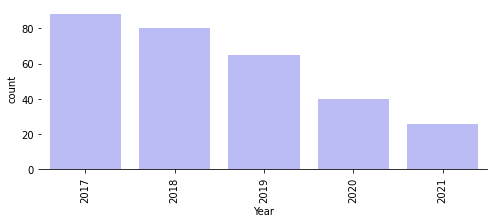

In [29]:
bar_plot(qualitative_list[0])

#### 6.2 - Month

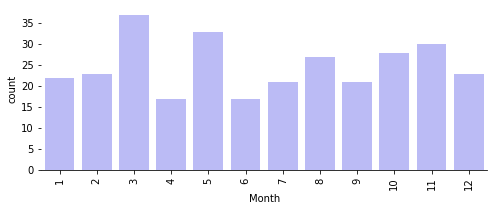

In [30]:
bar_plot(qualitative_list[1])

#### 6.3 - Week Day

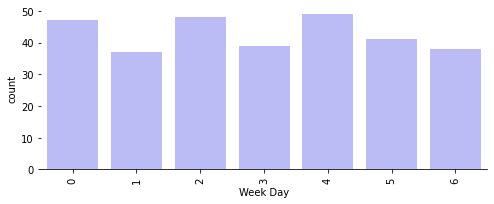

In [31]:
bar_plot(qualitative_list[2])

#### 6.4 - Antenna Frequency

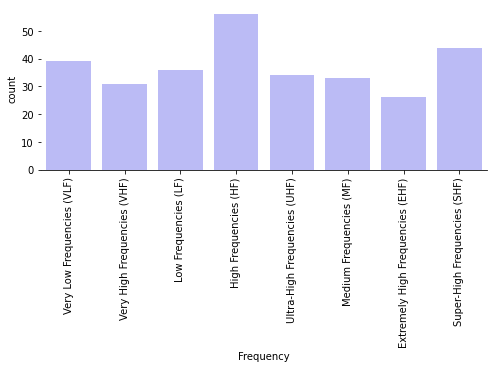

In [32]:
bar_plot(qualitative_list[3])

#### 6.5 - Signal Strength

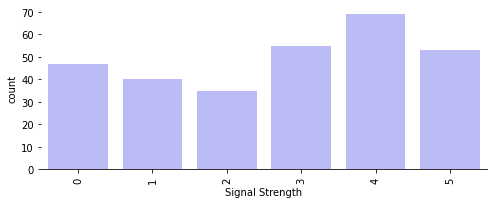

In [33]:
bar_plot(qualitative_list[4])

#### 6.6 - Antenna Type

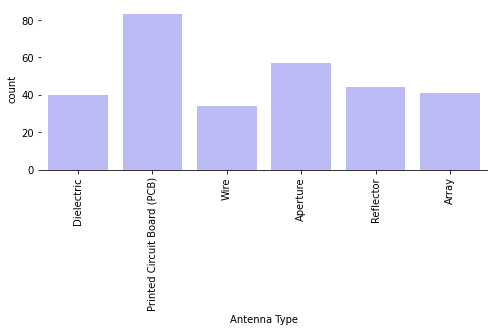

In [34]:
bar_plot(qualitative_list[5])

#### 6.7 - Orientation

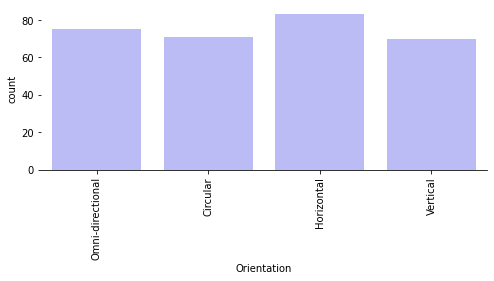

In [35]:
bar_plot(qualitative_list[6])

#### 6.8 - Power Supply

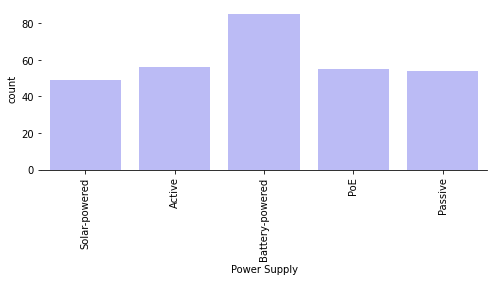

In [36]:
bar_plot(qualitative_list[7])

#### 6.9 - Zone

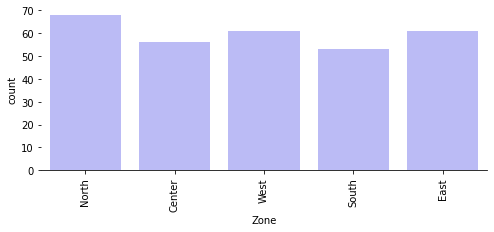

In [37]:
bar_plot(qualitative_list[8])